In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
def history(self, period="1mo", interval="1d",
            start=None, end=None, prepost=False, actions=True,
            auto_adjust=True, back_adjust=False,
            proxy=None, rounding=False, tz=None, timeout=None, **kwargs):
    """
    :Parameters:
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime.
            Default is 1900-01-01
        end: str
            Download end date string (YYYY-MM-DD) or _datetime.
            Default is now
        prepost : bool
            Include Pre and Post market data in results?
            Default is False
        auto_adjust: bool
            Adjust all OHLC automatically? Default is True
        back_adjust: bool
            Back-adjusted data to mimic true historical prices
        proxy: str
            Optional. Proxy server URL scheme. Default is None
        rounding: bool
            Round values to 2 decimal places?
            Optional. Default is False = precision suggested by Yahoo!
        tz: str
            Optional timezone locale for dates.
            (default data is returned as non-localized dates)
        timeout: None or float
            If not None stops waiting for a response after given number of
            seconds. (Can also be a fraction of a second e.g. 0.01)
            Default is None.
        **kwargs: dict
            debug: bool
                Optional. If passed as False, will suppress
                error message printing to console.
    """

In [ ]:
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

usd_pairs = [
    'EURUSD=X', 'USDJPY=X', 'GBPUSD=X', 'USDCHF=X', 'AUDUSD=X',
    'USDCAD=X', 'NZDUSD=X', 'EURJPY=X', 'GBPJPY=X', 'AUDJPY=X',
    'USDCNY=X', 'USDBRL=X', 'USDINR=X', 'USDRUB=X', 'USDZAR=X',
    'USDTRY=X', 'USDMXN=X', 'USDSEK=X', 'USDNOK=X', 'USDPLN=X',
]

eur_pairs = [
    'EURUSD=X', 'EURJPY=X', 'EURGBP=X', 'EURCHF=X', 'EURAUD=X',
    'EURCAD=X', 'EURNZD=X', 'EURUSD=X', 'EURJPY=X', 'EURGBP=X',
    'EURCNY=X', 'EURBRL=X', 'EURINR=X', 'EURRUB=X', 'EURZAR=X',
]


gbp_pairs = [
    'GBPUSD=X', 'GBPJPY=X', 'GBPEUR=X', 'GBPCHF=X', 'GBPAUD=X',
    'GBPCAD=X', 'GBPNZD=X', 'GBPUSD=X', 'GBPJPY=X', 'GBPEUR=X',
]

# Combine the lists
all_pairs = usd_pairs + eur_pairs + gbp_pairs

# Create Ticker objects for each forex pair
forex_tickers = {pair: yf.Ticker(pair) for pair in all_pairs}

# Create a dictionary to store historical data for each pair
historical_data =  {}

# Fetch and store historical data for each pair
for pair, ticker in forex_tickers.items():
    data = ticker.history(interval='5m', start='2023-12-01', end='2023-12-08')
    #data = ticker.history(interval='5m', start='2023-11-15', end='2023-11-23')
    #data = ticker.history(interval='5m',period='1w')
    historical_data[pair] = data['Close']
    #print(pair,len(data['Close']))


historical_data
df_histo = pd.DataFrame(historical_data)
df_histo = df_histo.ffill()
df_histo = df_histo.bfill()


In [ ]:
df_histo

,EURUSD=X,USDJPY=X,GBPUSD=X,USDCHF=X,AUDUSD=X,USDCAD=X,NZDUSD=X,EURJPY=X,GBPJPY=X,AUDJPY=X,...,EURCNY=X,EURBRL=X,EURINR=X,EURRUB=X,EURZAR=X,GBPEUR=X,GBPCHF=X,GBPAUD=X,GBPCAD=X,GBPNZD=X
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-12-01 00:00:00+00:00,1.089800,147.912994,1.263344,0.87451,0.660939,1.35480,0.616333,161.149002,186.869003,97.753998,...,7.7720,5.3665,90.796700,98.135002,20.522200,1.15954,1.10477,1.91143,1.71208,2.05026
2023-12-01 00:05:00+00:00,1.089800,147.947006,1.263488,0.87446,0.661179,1.35517,0.616409,161.182007,186.927994,97.802002,...,7.7738,5.3678,90.814201,98.156998,20.535910,1.15960,1.10482,1.91124,1.71227,2.05010
2023-12-01 00:10:00+00:00,1.090037,147.835007,1.263871,0.87416,0.661411,1.35484,0.616675,161.104996,186.841995,97.765999,...,7.7745,5.3682,90.818901,98.166000,20.535549,1.15964,1.10478,1.91109,1.71235,2.04957
2023-12-01 00:15:00+00:00,1.090156,147.865005,1.263887,0.87411,0.661271,1.35450,0.616827,161.143997,186.865997,97.764000,...,7.7755,5.3689,90.827301,98.179001,20.518200,1.15954,1.10462,1.91132,1.71225,2.04979
2023-12-01 00:20:00+00:00,1.090275,147.860992,1.263887,0.87409,0.661328,1.35440,0.616827,161.156998,186.871994,97.773003,...,7.7759,5.3692,90.782204,98.183998,20.531530,1.15951,1.10467,1.91114,1.71202,2.04916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-07 23:35:00+00:00,1.079447,144.112000,1.258891,0.87534,0.659578,1.35987,0.616599,155.507004,181.395996,95.039001,...,7.7149,5.2995,89.951897,99.696999,20.254601,1.16642,1.10174,1.90856,1.71166,2.04187
2023-12-07 23:40:00+00:00,1.079331,144.143005,1.258796,0.87535,0.659409,1.35994,0.616523,155.531998,181.427994,95.032997,...,7.7149,5.2995,89.948402,99.696999,20.305300,1.16642,1.10172,1.90899,1.71160,2.04199
2023-12-07 23:45:00+00:00,1.079447,144.026001,1.258891,0.87523,0.659561,1.35992,0.616523,155.423004,181.298004,94.974998,...,7.7149,5.2995,89.944199,99.696999,20.255501,1.16639,1.10173,1.90886,1.71192,2.04237


https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.coint.html

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [ ]:
# Create a matrix to store p-values for ADF test
num_pairs = len(all_pairs)
cointegration_matrix = pd.DataFrame(index=all_pairs, columns=all_pairs)
cointegration_ratio = pd.DataFrame(index=all_pairs, columns=all_pairs)
# Perform ADF test and fill in the matrix
for pair1 in all_pairs:
    for pair2 in all_pairs:
        if pair1 != pair2:  # Avoid testing the same pair against itself
            #print(df_histo[pair1].isna().sum, np.isinf(df_histo[pair1]).sum())
            #print(df_histo[pair2].isna().sum, np.isinf(df_histo[pair2]).sum())
            series1 = df_histo[pair1]
            series2 = df_histo[pair2]
            # Perform ADF test
            crit, p_value, _, _, critical_values, _ = adfuller(series1 - series2)

            if crit < critical_values['1%'] and crit < critical_values['5%'] and crit < critical_values['10%'] and p_value < 0.05 :
              statio = True
            else:
              statio =False
              coint = 0
            #print(pair1,pair2)
            #print(crit,critical_values)
            # Store p-value in the matrix


            cointegration_matrix.loc[pair1, pair2] = statio

In [ ]:
cointegration_matrix

,EURUSD=X,USDJPY=X,GBPUSD=X,USDCHF=X,AUDUSD=X,USDCAD=X,NZDUSD=X,EURJPY=X,GBPJPY=X,AUDJPY=X,...,GBPUSD=X,GBPJPY=X,GBPEUR=X,GBPCHF=X,GBPAUD=X,GBPCAD=X,GBPNZD=X,GBPUSD=X,GBPJPY=X,GBPEUR=X
EURUSD=X,NaN,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
USDJPY=X,False,NaN,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GBPUSD=X,False,False,NaN,False,False,False,False,False,False,False,...,NaN,False,False,False,False,False,False,NaN,False,False
USDCHF=X,False,False,False,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AUDUSD=X,False,False,False,False,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
USDCAD=X,False,False,False,False,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
NZDUSD=X,False,False,False,False,False,False,NaN,False,False,False,...,False,False,False,True,False,True,False,False,False,False
EURJPY=X,False,False,False,False,False,False,False,NaN,False,False,...,False,False,False,False,False,False,False,False,False,False
GBPJPY=X,False,False,False,False,False,False,False,False,NaN,False,...,False,NaN,False,False,False,False,False,False,NaN,False
AUDJPY=X,False,False,False,False,False,False,False,False,False,NaN,...,False,False,False,False,False,False,False,False,False,False


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


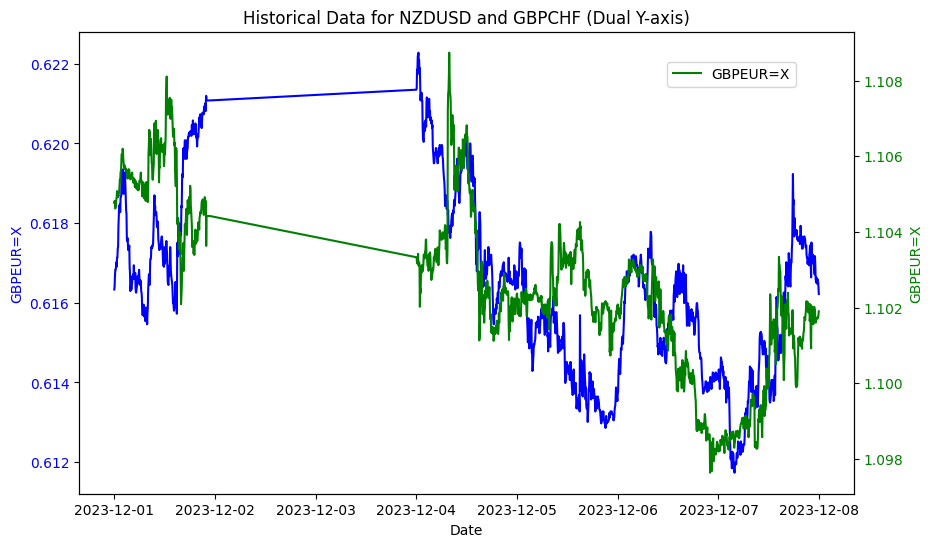

In [ ]:
# Create a figure and axis for the first pair (NZDUSD)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot NZDUSD on the left axis
ax1.plot(df_histo['NZDUSD=X'], color='blue', label=pair2)
ax1.set_xlabel('Date')
ax1.set_ylabel(pair2, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second axis for the second pair (GBPCHF) sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(df_histo['GBPCHF=X'], color='green', label=pair1)
ax2.set_ylabel(pair1, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legend
plt.title('Historical Data for NZDUSD and GBPCHF (Dual Y-axis)')
plt.legend(loc='upper left', bbox_to_anchor=(0.75, 0.95))

# Show the plot
plt.show()

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse


def VAR_pred(pair1,pair2):
  data = pd.DataFrame()
  data[f'{pair1}'] = df_histo[pair1]
  data[f'{pair2}'] = df_histo[pair2]

  # Division des données en ensembles d'entraînement et de test
  train_size = int(len(data) * 0.7)
  train, test = data[0:train_size], data[train_size:]
  #print('train', train)
  #print('test',test)

  # Vérification de la stationnarité des séries temporelles (peut être sauté si vos données sont déjà stationnaires)
  for column in data.columns:
      result = adfuller(data[column])
      print(f'ADF Statistic for {column}: {result[0]}, p-value: {result[1]}')

  # Création et ajustement du modèle VAR
  model = VAR(train)
  model_fitted = model.fit()

  # Prévisions sur l'ensemble de test
  lags = model_fitted.k_ar
  print('best lags : ', lags)
  forecast = model_fitted.forecast(train.values[-lags:], steps=len(test))

  # Création d'un DataFrame pour les prévisions
  forecast_df = pd.DataFrame(forecast, columns=[f'Forecast_{pair1}', f'Forecast_{pair2}'], index=test.index)

  # Évaluation des performances avec RMSE

  for i, col in enumerate(data.columns):
      rmse_val = rmse(test[col], forecast_df[f'Forecast_{col}'])
      print(f'RMSE for {col}: {rmse_val}')

  # Visualisation des résultats
  plt.figure(figsize=(12, 6))
  '''
  for col in data.columns:
      plt.plot(test.index, test[col], label=f'Actual {col}')
      plt.plot(test.index, forecast_df[f'Forecast_{col}'], label=f'Forecast {col}', linestyle='dashed')
  '''
  # Calculate upper and lower bounds based on historical volatility
  historical_volatility = data[f'{pair1}'].std()
  upper_bound = forecast_df[f'Forecast_{pair1}'] + historical_volatility
  lower_bound = forecast_df[f'Forecast_{pair1}'] - historical_volatility

  historical_volatility2 = data[f'{pair2}'].std()
  upper_bound2 = forecast_df[f'Forecast_{pair2}'] + historical_volatility2
  lower_bound2 = forecast_df[f'Forecast_{pair2}'] - historical_volatility2

  # Assume a confidence interval of 99%
  confidence_level = 0.99

  # Calculate confidence intervals
  z_score = 2.576  # for a 95% confidence interval
  forecast_std = forecast_df[f'Forecast_{pair1}'].std()
  margin_of_error = z_score * (forecast_std / np.sqrt(len(test)))

  forecast_std2 = forecast_df[f'Forecast_{pair2}'].std()
  margin_of_error2 = z_score * (forecast_std2 / np.sqrt(len(test)))

  forecast_ci = pd.DataFrame({
    'lower': forecast_df[f'Forecast_{pair1}'] - margin_of_error,
    'upper': forecast_df[f'Forecast_{pair1}'] + margin_of_error
  })

  forecast_ci_upper = pd.DataFrame({
    'lower': upper_bound - margin_of_error, # Lower IC upper
    'upper': upper_bound + margin_of_error
  })

  forecast_ci_lower = pd.DataFrame({
    'lower': lower_bound - margin_of_error,
    'upper': lower_bound + margin_of_error # Upper IC lower
  })

  forecast_ci2 = pd.DataFrame({
    'lower': forecast_df[f'Forecast_{pair2}'] - margin_of_error2,
    'upper': forecast_df[f'Forecast_{pair2}'] + margin_of_error2
  })

  forecast_ci2_upper = pd.DataFrame({
    'lower': upper_bound2 - margin_of_error, # Lower IC upper
    'upper': upper_bound2 + margin_of_error
  })

  forecast_ci2_lower = pd.DataFrame({
    'lower': lower_bound2 - margin_of_error,
    'upper': lower_bound2 + margin_of_error # Upper IC lower
  })


  plt.plot(test.index, test[f'{pair1}'], label=f'Actual {pair1}')
  plt.plot(test.index, forecast_df[f'Forecast_{pair1}'], label=f'Forecast {pair1}', linestyle='dotted')
  plt.plot(test.index, upper_bound, label='Upper Bound', linestyle='dashed', color='red')
  plt.plot(test.index, lower_bound, label='Lower Bound', linestyle='dashed', color='green')
  plt.fill_between(test.index, forecast_ci['lower'], forecast_ci['upper'], color='gray', alpha=0.2, label='99% Confidence Interval')
  plt.fill_between(test.index, forecast_ci_upper['lower'], forecast_ci_upper['upper'], color='red', alpha=0.2, label='99% Confidence Interval')
  plt.fill_between(test.index, forecast_ci_lower['lower'], forecast_ci_lower['upper'], color='green', alpha=0.2, label='99% Confidence Interval')
  plt.legend()
  plt.title('VAR Model - Forecast vs Actual')
  plt.show()

  plt.figure(figsize=(12, 6))
  plt.plot(test.index, test[f'{pair2}'], label=f'Actual {pair2}')
  plt.plot(test.index, forecast_df[f'Forecast_{pair2}'], label=f'Forecast {pair2}', linestyle='dotted')
  plt.plot(test.index, upper_bound2, label='Upper Bound', linestyle='dashed', color='red')
  plt.plot(test.index, lower_bound2, label='Lower Bound', linestyle='dashed', color='green')
  plt.fill_between(test.index, forecast_ci2['lower'], forecast_ci2['upper'], color='gray', alpha=0.2, label='99% Confidence Interval')
  plt.fill_between(test.index, forecast_ci2_upper['lower'], forecast_ci2_upper['upper'], color='red', alpha=0.2, label='99% Confidence Interval')
  plt.fill_between(test.index, forecast_ci2_lower['lower'], forecast_ci2_lower['upper'], color='green', alpha=0.2, label='99% Confidence Interval')
  plt.legend()
  plt.title('VAR Model - Forecast vs Actual')
  plt.show()
  #print(forecast_df)
  return forecast_df,forecast_ci,forecast_ci_upper['lower'],forecast_ci_lower['upper'],forecast_ci2,forecast_ci2_upper['lower'],forecast_ci2_lower['upper']

In [ ]:
def backtest(pair1,pair2,df):
  df_histo = df
  forecast ,pred_IC ,UB_lower ,LB_upper , pred_IC_2, UB_lower_2, LB_upper_2 = VAR_pred(pair1,pair2)
  achat = 0
  vente = 0
  ptf = 100
  L_ptf = []
  entry = []
  close = []
  type_trade = []
  for i in range(1,3):
    if i == 1:
      in_trade_long = False
      in_trade_short = False
      pair = pair1
      IC = pred_IC
      UB = UB_lower
      LB = LB_upper
    else:
      in_trade_long = False
      in_trade_short = False
      pair = pair2
      IC = pred_IC_2
      UB = UB_lower_2
      LB = LB_upper_2

    for i in range(len(forecast)):
        if in_trade_long == True or in_trade_short == True:
          if df_histo[pair].tail(len(forecast)).iloc[i] > IC['lower'].iloc[i] and in_trade_long == True:  #Close long
            in_trade_long = False
            vente = df_histo[pair].tail(len(forecast)).iloc[i]
            ptf += ptf*(vente-achat)
            L_ptf.append(ptf)
            close.append((df_histo[pair].tail(len(forecast)).iloc[i],df_histo[pair].tail(len(forecast)).index[i]))


          elif df_histo[pair].tail(len(forecast)).iloc[i] < IC['upper'].iloc[i] and in_trade_short == True:  #Close short
            in_trade_short = False
            achat = df_histo[pair].tail(len(forecast)).iloc[i]
            ptf += ptf*(vente-achat)
            L_ptf.append(ptf)
            close.append((df_histo[pair].tail(len(forecast)).iloc[i],df_histo[pair].tail(len(forecast)).index[i]))

        else:
          if df_histo[pair].tail(len(forecast)).iloc[i] < LB.iloc[i]: #Long gbp
            in_trade_long = True
            achat = df_histo[pair].tail(len(forecast)).iloc[i]
            entry.append((df_histo[pair].tail(len(forecast)).iloc[i],df_histo[pair].tail(len(forecast)).index[i]))

            type_trade.append('Long')

          elif df_histo[pair].tail(len(forecast)).iloc[i] > UB.iloc[i]: #Short gbp
            in_trade_short = True
            vente = df_histo[pair].tail(len(forecast)).iloc[i]
            entry.append((df_histo[pair].tail(len(forecast)).iloc[i],df_histo[pair].tail(len(forecast)).index[i]))

            type_trade.append('Short')
    if in_trade_long == True or in_trade_short == True:
      close.append('NaN')
      L_ptf.append('NaN')
    # if in_trade_long == True or in_trade_short == True:
    #     if df_histo[pair].tail(len(forecast)).iloc[i] > IC['lower'].iloc[i] and in_trade_long == True:  #Close long
    #         in_trade_long = False
    #         vente = df_histo[pair].tail(len(forecast)).iloc[i]
    #         ptf += ptf*(vente-achat)
    #         close.append((df_histo[pair].tail(len(forecast)).iloc[i],df_histo[pair].tail(len(forecast)).index[i]))

    #     elif df_histo[pair].tail(len(forecast)).iloc[i] < IC['upper'].iloc[i] and in_trade_short == True:  #Close short
    #         in_trade_short = False
    #         achat = df_histo[pair].tail(len(forecast)).iloc[i]
    #         ptf += ptf*(vente-achat)
    #         close.append((df_histo[pair].tail(len(forecast)).iloc[i],df_histo[pair].tail(len(forecast)).index[i]))

    df_res = pd.DataFrame()
    df_res['Trade'] = pd.Series(type_trade)
    df_res['Entry'] = pd.Series(entry)
    df_res['Close'] = pd.Series(close)
    df_res['PnL'] = pd.Series(L_ptf)

  return df_res,ptf



ADF Statistic for GBPCHF=X: -1.9144384013470697, p-value: 0.3252996127386881
ADF Statistic for NZDUSD=X: -2.0766966955675814, p-value: 0.2539876163666094
best lags :  1
RMSE for GBPCHF=X: 0.003284674493339645
RMSE for NZDUSD=X: 0.0019769607505106786


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

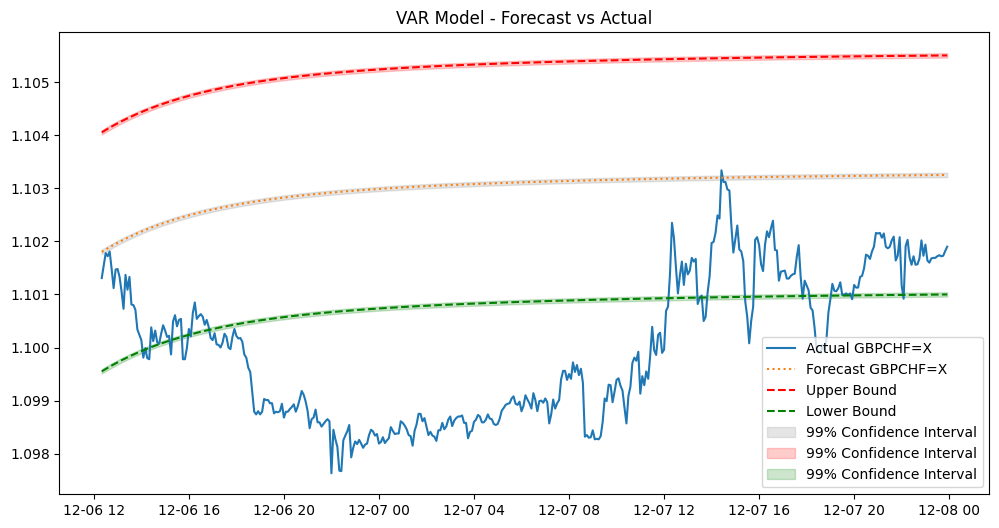

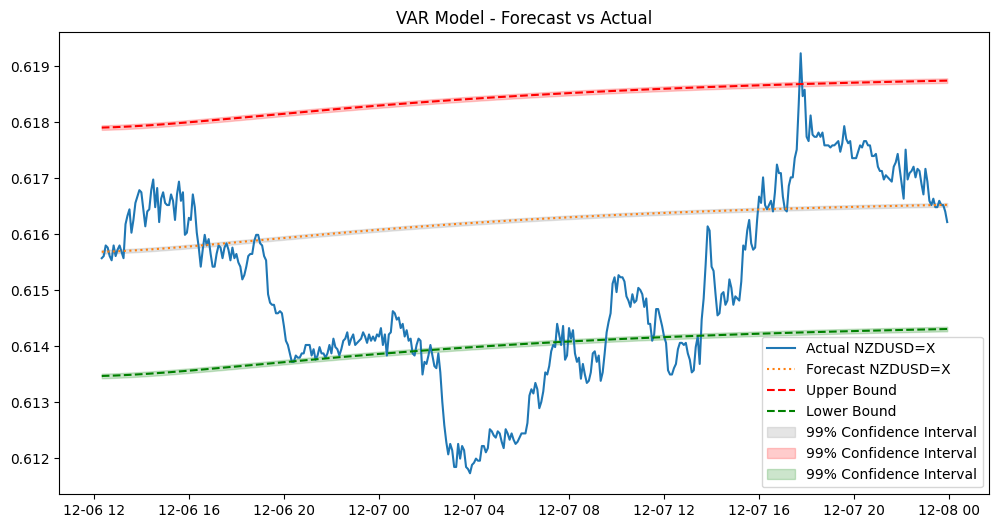

In [ ]:
df_res,pt = backtest('GBPCHF=X','NZDUSD=X',df_histo)

In [ ]:
df_res

,Trade,Entry,Close,PnL
0,Long,"(1.099810004234314, 2023-12-06 14:05:00+00:00)","(1.1033400297164917, 2023-12-07 14:25:00+00:00)",100.353003
1,Long,"(1.1008700132369995, 2023-12-07 15:25:00+00:00)",NaN,NaN
2,Long,"(0.6137228608131409, 2023-12-06 20:20:00+00:00)","(0.6166749000549316, 2023-12-07 16:00:00+00:00)",100.649249
3,Short,"(0.6192333698272705, 2023-12-07 17:45:00+00:00)","(0.6165228486061096, 2023-12-07 23:15:00+00:00)",100.92206


ADF Statistic for GBPCHF=X: -1.9144384013470697, p-value: 0.3252996127386881
ADF Statistic for NZDUSD=X: -2.0766966955675814, p-value: 0.2539876163666094
best lags :  1
RMSE for GBPCHF=X: 0.003284674493339645
RMSE for NZDUSD=X: 0.0019769607505106786


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

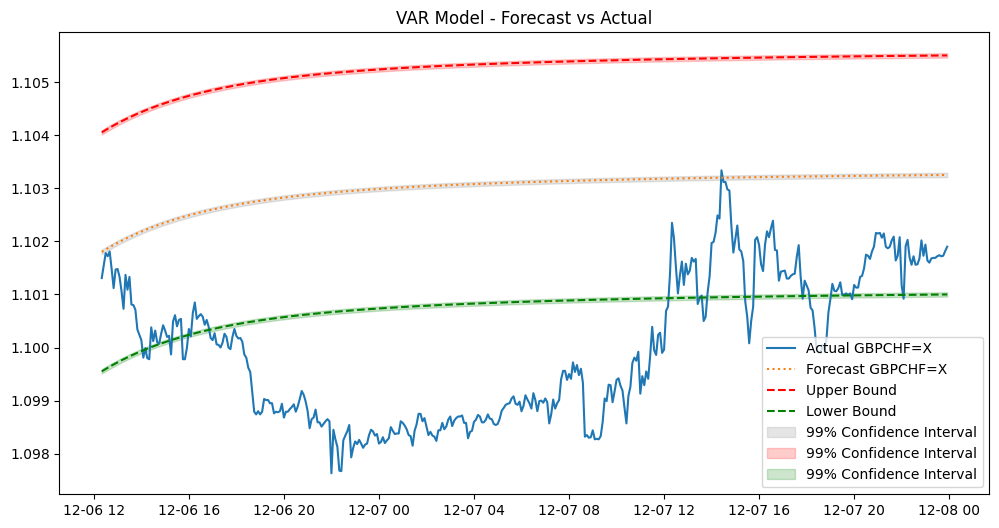

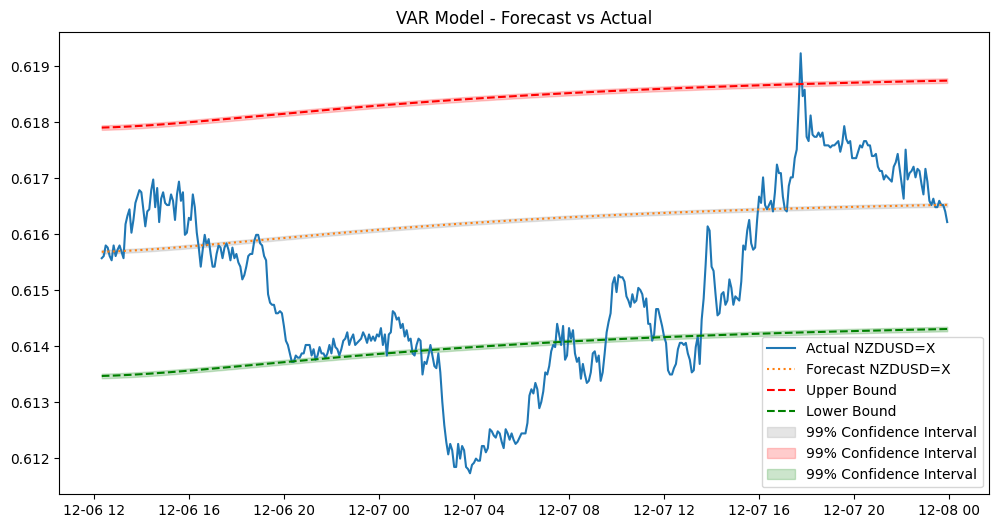

ADF Statistic for GBPCAD=X: -3.021364078258662, p-value: 0.032946860934261836
ADF Statistic for NZDUSD=X: -2.0766966955675814, p-value: 0.2539876163666094
best lags :  1
RMSE for GBPCAD=X: 0.0029361990686879737
RMSE for NZDUSD=X: 0.002343117288011278


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

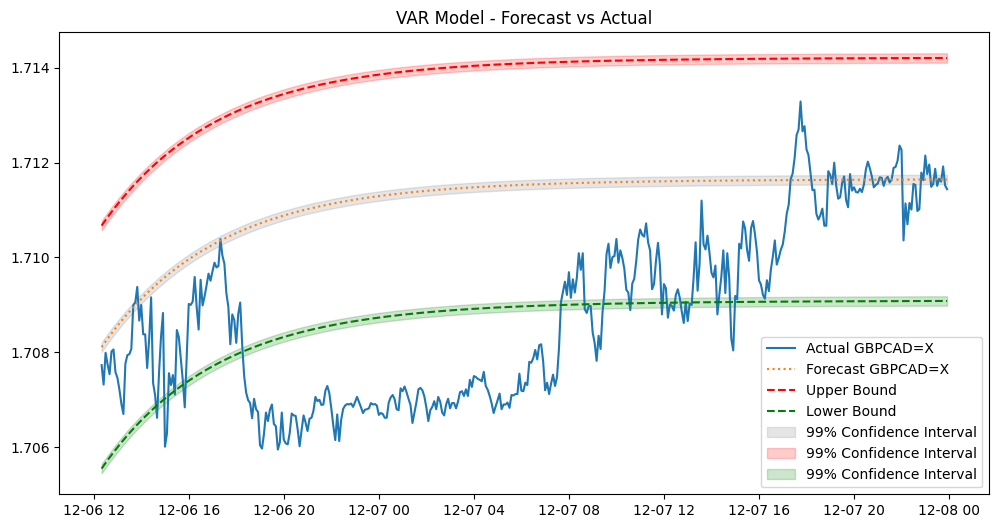

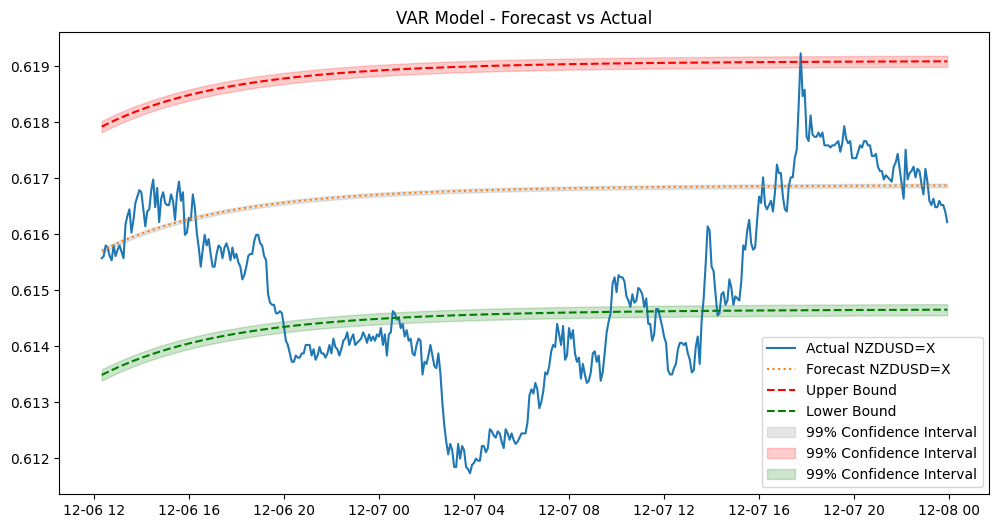

ADF Statistic for EURCAD=X: -2.6416093196190933, p-value: 0.08469873146133255
ADF Statistic for GBPCHF=X: -1.9144384013470697, p-value: 0.3252996127386881
best lags :  1
RMSE for EURCAD=X: 0.0015177837770860994
RMSE for GBPCHF=X: 0.0021922028397133213


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

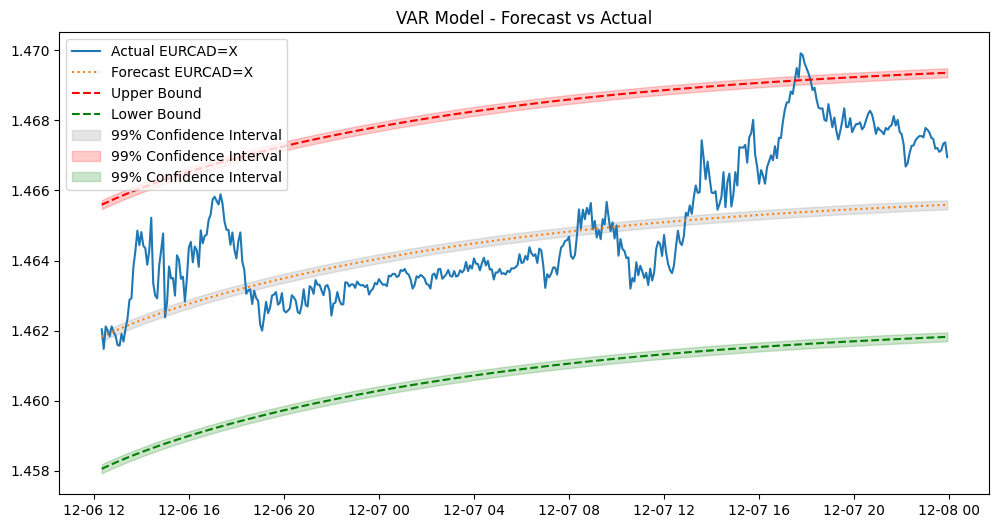

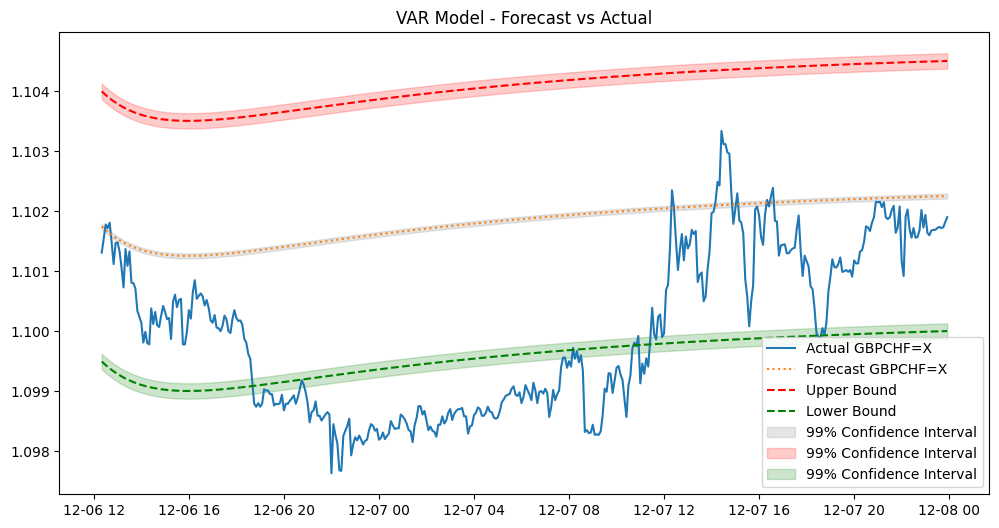

ADF Statistic for EURCAD=X: -2.6416093196190933, p-value: 0.08469873146133255
ADF Statistic for EURCHF=X: -2.284720784250519, p-value: 0.1769431840626911
best lags :  1
RMSE for EURCAD=X: 0.001611614382776947
RMSE for EURCHF=X: 0.001098849151390391


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

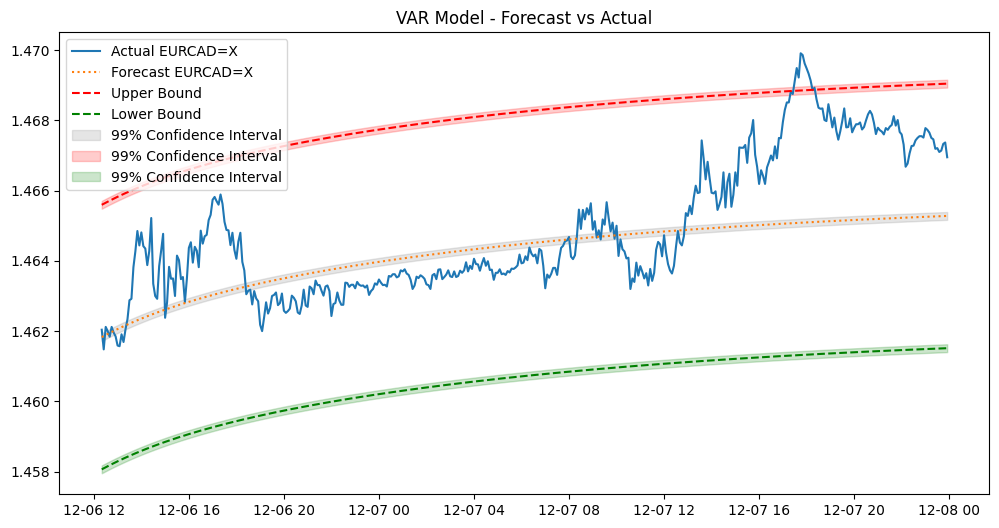

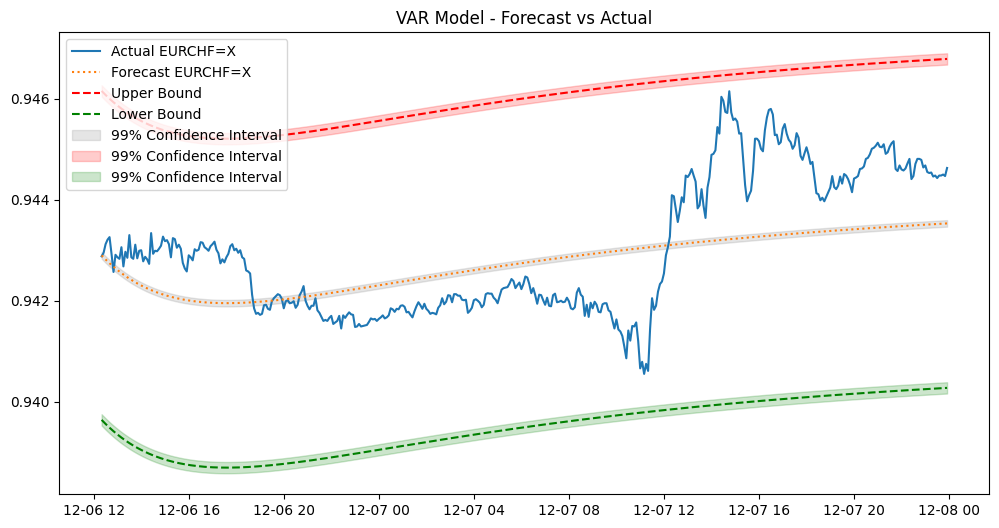

ADF Statistic for GBPCHF=X: -1.9144384013470697, p-value: 0.3252996127386881
ADF Statistic for GBPCAD=X: -3.021364078258662, p-value: 0.032946860934261836
best lags :  1
RMSE for GBPCHF=X: 0.003285070932811901
RMSE for GBPCAD=X: 0.0029225353510156263


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

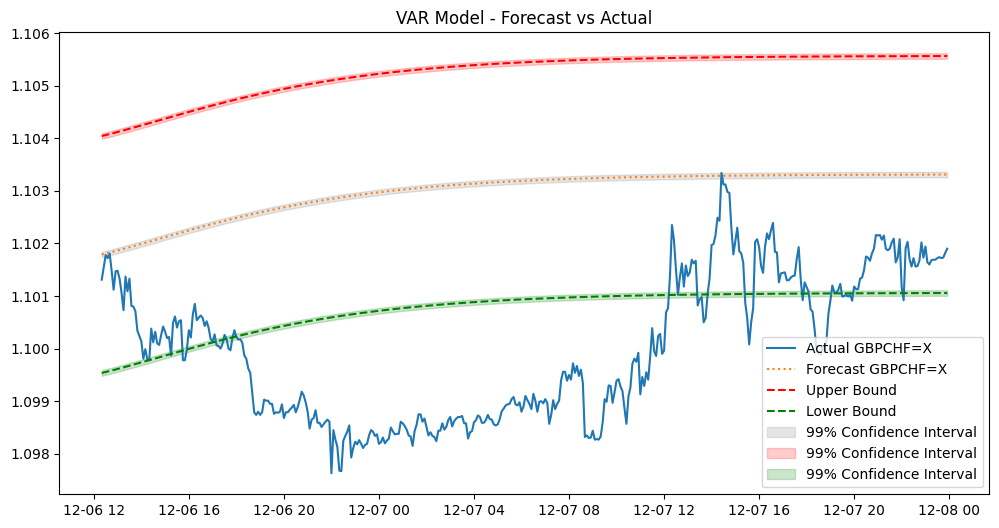

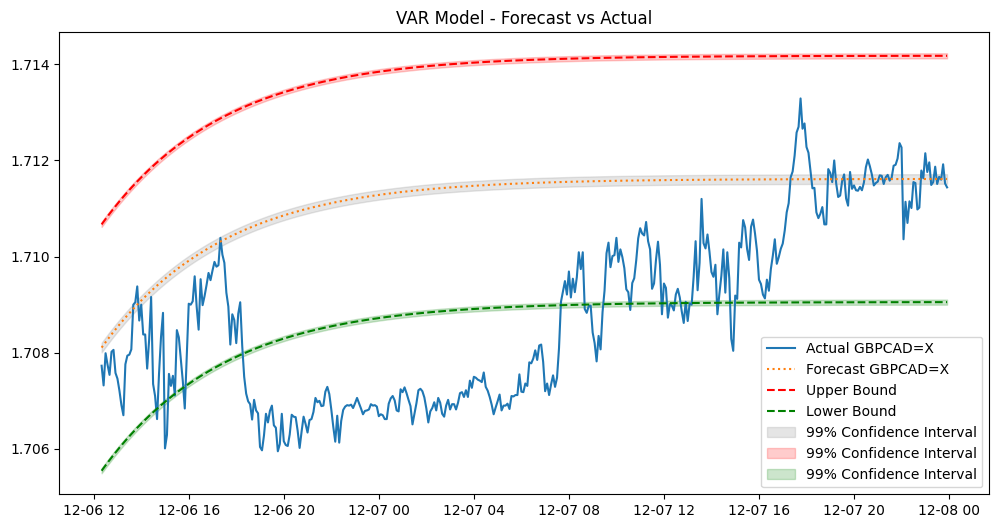

In [ ]:
gbpchf_nzdusd,_ ,_ , _, _, _, _ = VAR_pred('GBPCHF=X','NZDUSD=X')
gbpcad_nzdusd,_ ,_ , _, _, _, _= VAR_pred('GBPCAD=X','NZDUSD=X')
eurcad_gbpchf,_ ,_ , _, _, _, _= VAR_pred('EURCAD=X','GBPCHF=X')
eurcad_eurchf,_ ,_ , _, _, _, _ = VAR_pred('EURCAD=X','EURCHF=X')
gbpchf_gbpcad,_ ,_ , _, _, _, _= VAR_pred('GBPCHF=X','GBPCAD=X')


In [ ]:
def show_error(pair1,pair2):
  pred,_ ,_ , _, _, _, _ = VAR_pred(pair1,pair2)

  error_pair1 = pred[f'Forecast_{pair1}'] - df_histo[f'{pair1}'].tail(len(pred))
  error_pair2 = pred[f'Forecast_{pair2}'] - df_histo[f'{pair2}'].tail(len(pred))

  error_pair1.plot()
  error_pair2.plot()

ADF Statistic for EURCAD=X: -2.6416093196190933, p-value: 0.08469873146133255
ADF Statistic for EURCHF=X: -2.284720784250519, p-value: 0.1769431840626911
best lags :  1
RMSE for EURCAD=X: 0.001611614382776947
RMSE for EURCHF=X: 0.001098849151390391


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

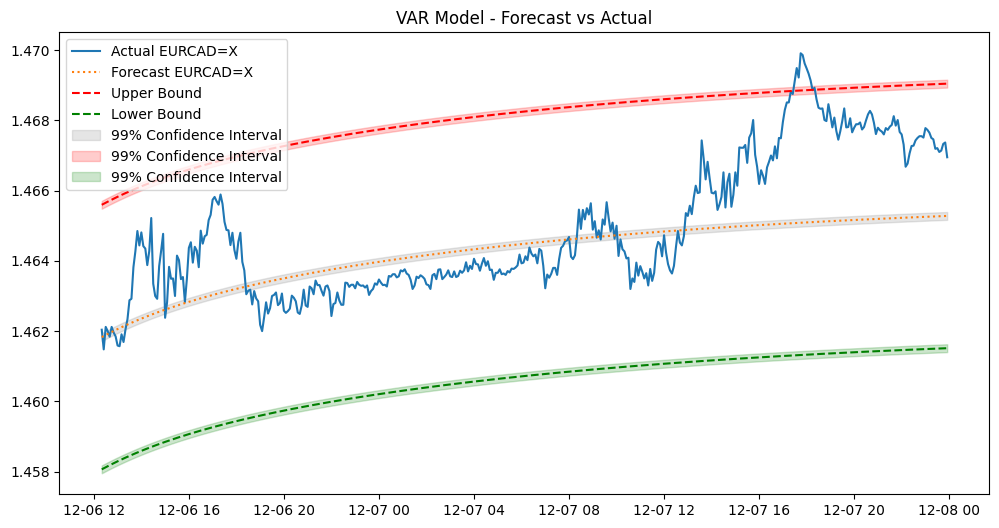

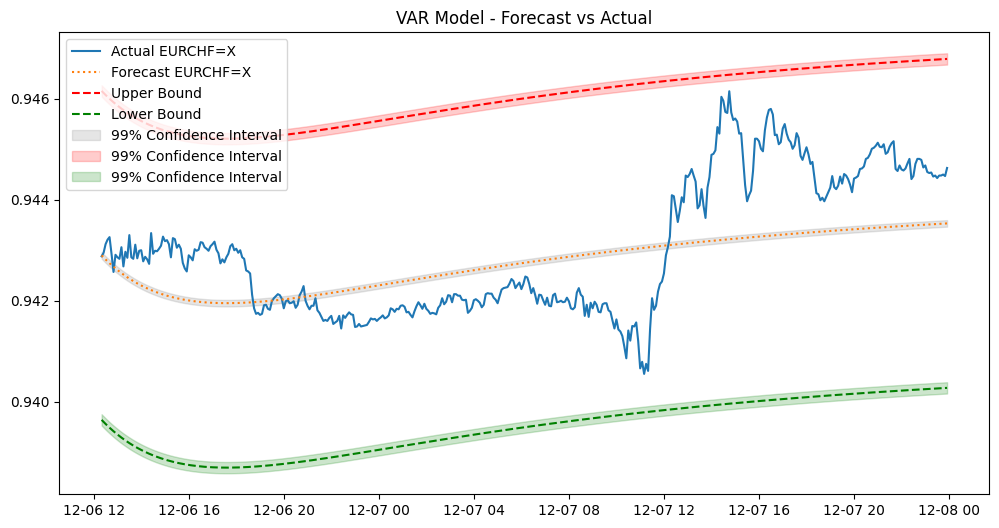

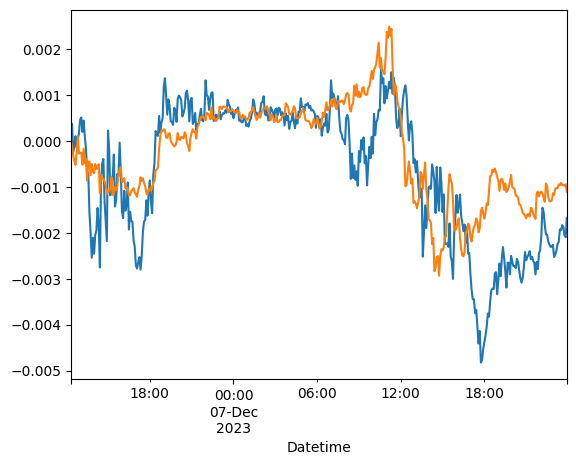

In [ ]:
show_error('EURCAD=X','EURCHF=X')